# Telco Cusstomer Churn: Model Training

### **Do Feature importance for numerical or corr or vif**
### **Do W or Importnace for cat cols or chi sql test**
### **Target encoding for more than 2 and if 2 label encoding**
### **in model training use smotek to undersample or oversample** 
### **Use Optuna**
### ***Target >80%**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd

# Read the saved datasets
X_train = pd.read_csv("artifacts/feature_engineering/X_train.csv")
X_test  = pd.read_csv("artifacts/feature_engineering/X_test.csv")
y_train = pd.read_csv("artifacts/feature_engineering/y_train.csv")
y_test  = pd.read_csv("artifacts/feature_engineering/y_test.csv")

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (5634, 21), y_train: (5634, 1)
X_test: (1409, 21), y_test: (1409, 1)


## Base Model: Linear Regression

In [5]:
model_lr = LinearRegression() 
model_lr.fit(X_train, y_train) 
test_score = model_lr.score(X_test, y_test) 
train_score = model_lr.score(X_train, y_train) 
train_score, test_score

(0.1705560177953105, 0.17593116660577524)

In [6]:
y_pred = model_lr.predict(X_test)

In [8]:
mse_lr = mean_squared_error(y_test, y_pred) 
rmse_lr = np.sqrt(mse_lr) 
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  365.2001571336714 RMSE:  19.110210808195482


In [9]:
X_test.shape

(1409, 21)

In [11]:
np.set_printoptions(suppress=True, precision=6) 
model_lr.coef_

array([[-8.091621, 24.38807 ,  1.009435,  0.401057, -4.328477,  0.833146,
         1.914801,  3.037772, -2.352524, -0.577576, -1.457899, -1.457496,
         0.513592, -3.563949,  1.231032, -2.866549, -2.26013 ,  1.747359,
         0.335023,  1.950137, -0.034779]])

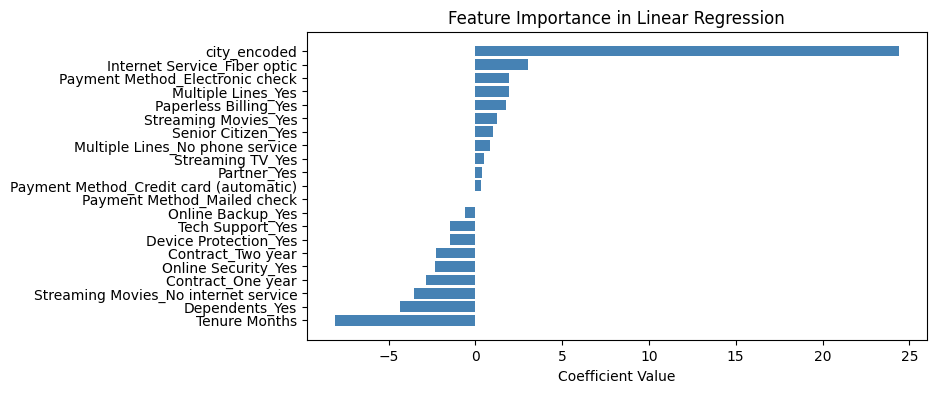

In [14]:
feature_importance = model_lr.coef_.ravel()

# Create a DataFrame for easier handling 
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients']) 
# Sort the coefficients for better visualization 
coef_df = coef_df.sort_values(by='Coefficients', ascending=True) 
# Plotting 
plt.figure(figsize=(8, 4)) 
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue') 
plt.xlabel('Coefficient Value') 
plt.title('Feature Importance in Linear Regression') 
plt.show()

In [15]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Define models and their parameter grids
models = {
    "LinearRegression": (
        LinearRegression(),
        {
            "fit_intercept": [True, False],
            "positive": [True, False]
        }
    ),
    "Ridge": (
        Ridge(),
        {
            "alpha": [0.01, 0.1, 1, 10, 100]
        }
    ),
    "Lasso": (
        Lasso(max_iter=5000),
        {
            "alpha": [0.01, 0.1, 1, 10, 100]
        }
    ),
    "RandomForest": (
        RandomForestRegressor(random_state=42),
        {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    ),
    "GradientBoosting": (
        GradientBoostingRegressor(random_state=42),
        {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5]
        }
    ),
    "SVR": (
        SVR(),
        {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    )
}

best_model = None
best_score = -np.inf
best_params = None
best_name = None

results = []

overall_start = time.time()

# Loop through models
for name, (model, param_grid) in models.items():
    print(f"\n🔍 Running GridSearchCV for {name}...")
    start = time.time()
    
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring="r2",   # or "neg_mean_squared_error"
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train, y_train)
    elapsed = time.time() - start
    
    print(f"⏱ Time Taken: {elapsed:.2f} seconds")
    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Best CV Score for {name}: {grid.best_score_:.4f}")
    
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "CV Score": grid.best_score_,
        "Time Taken (s)": round(elapsed, 2)
    })
    
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model = grid.best_estimator_
        best_params = grid.best_params_
        best_name = name

overall_end = time.time()
total_time = overall_end - overall_start

# Show results in a DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Summary of Models:")
print(results_df)

print("\n✅ Final Best Model:")
print("Name:", best_name)
print("Best Params:", best_params)
print("Best CV Score:", best_score)
print("Test Score:", best_model.score(X_test, y_test))
print(f"⏱ Total Time Taken: {total_time:.2f} seconds")


🔍 Running GridSearchCV for LinearRegression...
⏱ Time Taken: 4.51 seconds
Best Params for LinearRegression: {'fit_intercept': True, 'positive': False}
Best CV Score for LinearRegression: 0.1633

🔍 Running GridSearchCV for Ridge...
⏱ Time Taken: 0.10 seconds
Best Params for Ridge: {'alpha': 1}
Best CV Score for Ridge: 0.1633

🔍 Running GridSearchCV for Lasso...
⏱ Time Taken: 0.10 seconds
Best Params for Lasso: {'alpha': 0.01}
Best CV Score for Lasso: 0.1635

🔍 Running GridSearchCV for RandomForest...


c:\Users\linto\Code\churn-x\.venv\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


⏱ Time Taken: 13.64 seconds
Best Params for RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score for RandomForest: 0.1774

🔍 Running GridSearchCV for GradientBoosting...


c:\Users\linto\Code\churn-x\.venv\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


⏱ Time Taken: 5.98 seconds
Best Params for GradientBoosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best CV Score for GradientBoosting: 0.1837

🔍 Running GridSearchCV for SVR...


c:\Users\linto\Code\churn-x\.venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


⏱ Time Taken: 8.12 seconds
Best Params for SVR: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV Score for SVR: 0.1628

📊 Summary of Models:
              Model                                        Best Params  \
0  LinearRegression         {'fit_intercept': True, 'positive': False}   
1             Ridge                                       {'alpha': 1}   
2             Lasso                                    {'alpha': 0.01}   
3      RandomForest  {'max_depth': 10, 'min_samples_split': 5, 'n_e...   
4  GradientBoosting  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...   
5               SVR        {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}   

   CV Score  Time Taken (s)  
0  0.163260            4.51  
1  0.163278            0.10  
2  0.163510            0.10  
3  0.177436           13.64  
4  0.183684            5.98  
5  0.162757            8.12  

✅ Final Best Model:
Name: GradientBoosting
Best Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best CV S